# Computational Modelling - Martijn, Sinem en Gijs
## Het data science proces
Voor dit casusopdracht doorlopen we de eerste 4 stappen in het proces.

- 1. Data collection, hiervoor hebben we al een dataset toegewezen  gekregen

- 2. Data processing, bewerken van de dataset, dit is grotendeels al gedaan

- 3. Data cleaning, opzoek naar dubbele en missende waarden

- 4. Data exploration & analysishoe kunnen we met deze data de vragen beantwoorden 

- 5. Model building, relaties tussen variabelen leggen

- 6. Visualization, verkenning van de data ondersteunen

- 7. Communication, data science pipeline netjes genoteerd inleveren 


## Onderzoeksvragen:
- In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
- Wat is de verhouding tussen bioscoopgangers en netflixabonnementen?
- In hoeverre mate komt een film in aanmerking voor een sequel?
- Wat is de invloed op populariteit van een film als er een populaire acteur wordt gecast?

## Eerste verkenning:
Voor de eerste verkenning laden we met de python module pandas de file 'movie.csv' in zodat we goed bekijken wat daadwerkelijk in de database staat.

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
movies = pd.read_csv('movie.csv')

In [3]:
# read in and explore data
movies.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


# Data analyses 

In [4]:
# list of features within dataset 
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

De kolommen die we van plan zijn mee te nemen omdat ze relevant zijn voor de onderzoeksvragen die we hebben opgesteld:

- movie_title
- title_year
- imdb_score
- movie_facebook_likes
- director_name
- gross
- duration
- num_voted_users
- actor_1_name 
- actor_2_name
- actor_3_name
- actor_1_facebook_likes
- actor_2_facebook_likes
- actor_3_facebook_likes
- genres

In [5]:
# sample of the dataset 
movies.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4188,Color,Gus Van Sant,63.0,104.0,835.0,535.0,Udo Kier,18000.0,6401336.0,Drama,...,153.0,English,USA,R,2500000.0,1991.0,595.0,7.1,1.78,0
2208,Color,John Luessenhop,282.0,92.0,34.0,322.0,Keram Malicki-Sánchez,383.0,34334256.0,Horror|Thriller,...,255.0,English,USA,R,11000000.0,2013.0,333.0,4.8,2.35,16000
4161,Color,Victor Nunez,61.0,113.0,9.0,42.0,Patricia Richardson,402.0,9054736.0,Drama,...,57.0,English,USA,R,2700000.0,1997.0,222.0,7.1,1.66,381
792,Color,Patrick Gilmore,98.0,85.0,0.0,82.0,Adriano Giannini,11000.0,26288320.0,Adventure|Animation|Comedy|Drama|Family|Fantas...,...,91.0,English,USA,PG,60000000.0,2003.0,102.0,6.7,1.66,880
1131,Color,Barry Sonnenfeld,87.0,74.0,188.0,865.0,Janeane Garofalo,11000.0,7262288.0,Comedy|Crime|Thriller,...,186.0,English,USA,PG-13,40000000.0,2002.0,1000.0,6.5,1.85,892


Observations: 

- Er zijn in totaal 5038(?) films (inclusief dubbele waarden)
- Met movies.duplicated(subset=None,keep='first').sum() zien we hoeveel dubbele waarden er zijn: 45
- 4939 director_names
- 5030 actor_2_name
- 5038 country 

In [6]:
movies.duplicated(subset=None,keep='first').sum()

45

We kunnen per kolom gaan bekijken hoeveel NULL waarden er per kolom in de dataset zijn d.m.v. pd.isnull().sum()

In [7]:
pd.isnull(movies).sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Alle kolommen hebben NULL-waarden behalve: genres, movie_title, num_voted_users, cast_total_facebook_likes, movie_imdb_link, imdb_score.

Wat opvalt is dat gross de meeste NULL-waarden heeft. In totaal zijn er voor gross 4.159000e+03	records (4159) waarvan er 884 ontbreken. Dit is 21,26%. Aangezien we dit kolom wel willen meenemen is dit een belangrijk punt waar we rekening mee moeten houden bij verdere uitwerkingen

# Voorspellingen

Aan de hand van de onderzoeksvragen kunnen we ook voorspellingen gaan doen die ons helpen bij het beantwoorden van deze vragen

Voorspelling: Hoe meer likes een bepaald acteur/actrice op facebook krijgt (dus hoe populairder de acteur/actrice is), hoe hoger de kans is dat de film waarin de acteur/actrice in speelt ook meer bekeken wordt.

Onderzoeksvraag: Wat is de invloed op populariteit van een film als er een populaire acteur wordt gecast?

We nemen de onderstaande kolommen mee om te meten hoe 'populair' een acteur/actrice is door de facebook-likes te nemen
- actor_2_name
- actor_2_facebook_likes

In [8]:
q = movies['actor_2_facebook_likes'].head(10)

In [9]:
r = movies['actor_2_name'].head(10)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text xticklabel objects>)

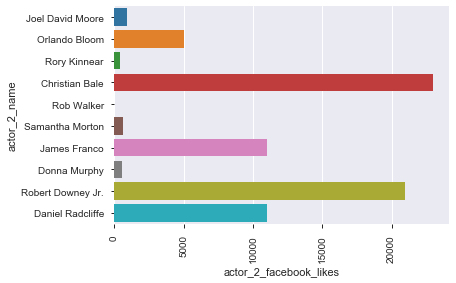

In [10]:
h = sns.barplot(x=q, y=r, data=movies)
plt.xticks(rotation=90)

We zien dus dat acteur Christian Bale de meeste facebook-likes heeft en daarmee voorspellen we ook dat hij in de beter bekeken film zit uit die lijst van 10.
Daarnaast missen we de likes van Rob Walker, maar het feit dat we nooit van deze man hebben gehoord zal ook genoeg zeggen over zijn facebook likes, het is dus niet waarschijnlijk dat hij Christian Bale inhaalt.

Om te kijken of de meest populaire acteurs ook in beter bekeken films zitten gaan we ook het volgende plotten:

In [11]:
# als voorbeeld nemen we alleen 10 records
# variabele x zijn de film 
x = movies['movie_title'].head(10)

In [12]:
# variabele y zijn de scores die elk film heeft gescoord op IMDB
y = movies['imdb_score'].head(10)

Als we variabele x en y gaan plotten met behulp van module seaborn kunnen we zien hoe elke film heeft gescoord en welke bijvoorbeeld uitsteekt. 

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

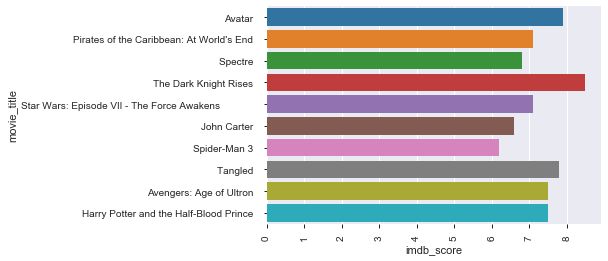

In [13]:
g = sns.barplot(x=y, y=x, data=movies)
plt.xticks(rotation=90)

Hogere imdb-score is niet altijd een meer bekeken film. Num_voted_users geeft weer hoeveel mensen er voor een film hebben gestemd. De mensen die hebben gestemd hebben hoogstwaarschijnlijk ook de film bekeken. Deze kolom kunnen we dus als maatstaf nemen. 
- Movies_title
- Num_voted_users


In [14]:
# de films
a = movies['movie_title'].head(10)

In [15]:
# aantal stemmen wat een film heeft gescoord
b = movies['num_voted_users'].head(10)

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000.]), <a list of 8 Text xticklabel objects>)

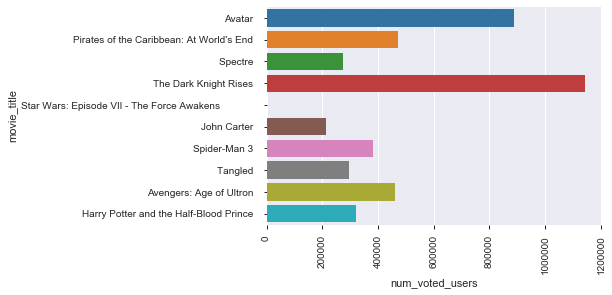

In [16]:
# bovenstaande data a en b gaan plotten in een grafiek
i = sns.barplot(x=b, y=a, data=movies)
plt.xticks(rotation=90)

De meest bekeken film is in de bovenste voorbeeld ‘The Dark Knight Rises’ en daarbij hoort acteur Christian Bale, die ook de meeste likes heeft. 
Echter is de film met de minste stemmen ‘John Carter’ waar actrice Samanta Morton bij hoort, die niet de minste likes heeft. 


# Opschonen Dataset
Bij het opschonen van de dataset kunnen we een variabele 'selection' maken die de kolommen meeneemt uit bovenstaande selectie:

In [17]:
selection = movies[['movie_title', 'title_year', 'imdb_score', 'movie_facebook_likes', 'director_name', 'gross', 'duration', 'num_voted_users', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'genres']]

Als een film geen 'movie_title' heeft zegt de rest van de data niet zoveel meer, dus we kunnen alle rijen zonder 'movie_title' droppen. Daarnaast droppen we ook alle rijen die meer dan 1 NaN waarde hebben. Ook moeten de volledig dubbele rijen eruit gefilterd worden, anders komt precies dezelfde data 2 keer voor

In [18]:
selection.dropna(subset=['movie_title'], inplace=True)
selection.dropna(thresh=14, inplace=True)
selection.drop_duplicates(subset=None, keep='first', inplace=True)

In [19]:
print(len(selection))

4863


De oorspronkelijke lengte van de dataset was 5043 records, we houden uiteindelijk 4863 records over, wat betekent dat we 3,57% van de dataset kwijtraken

Heel veel waarden (zoals title_year) zijn floats, deze moeten allemaal worden omgezet naar int. Ook kan de movie_title als index worden gebruikt, omdat dit een unieke waarde is (dubbele zijn eruit gehaald)

In [20]:
selection[['title_year', 'gross', 'duration', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']] = selection[['title_year', 'gross', 'duration', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].fillna(value=0)
selection = selection.astype({'title_year': int, 'gross': int, 'duration': int, 'actor_1_facebook_likes': int, 'actor_2_facebook_likes': int, 'actor_3_facebook_likes': int})
selection.set_index('movie_title', inplace=True)
selection.head(10)

,title_year,imdb_score,movie_facebook_likes,director_name,gross,duration,num_voted_users,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,genres
movie_title,,,,,,,,,,,,,,
Avatar,2009,7.9,33000,James Cameron,760505847,178,886204,CCH Pounder,Joel David Moore,Wes Studi,1000,936,855,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,2007,7.1,0,Gore Verbinski,309404152,169,471220,Johnny Depp,Orlando Bloom,Jack Davenport,40000,5000,1000,Action|Adventure|Fantasy
Spectre,2015,6.8,85000,Sam Mendes,200074175,148,275868,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000,393,161,Action|Adventure|Thriller
The Dark Knight Rises,2012,8.5,164000,Christopher Nolan,448130642,164,1144337,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,Action|Thriller
John Carter,2012,6.6,24000,Andrew Stanton,73058679,132,212204,Daryl Sabara,Samantha Morton,Polly Walker,640,632,530,Action|Adventure|Sci-Fi
Spider-Man 3,2007,6.2,0,Sam Raimi,336530303,156,383056,J.K. Simmons,James Franco,Kirsten Dunst,24000,11000,4000,Action|Adventure|Romance
Tangled,2010,7.8,29000,Nathan Greno,200807262,100,294810,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,Adventure|Animation|Comedy|Family|Fantasy|Musi...
Avengers: Age of Ultron,2015,7.5,118000,Joss Whedon,458991599,141,462669,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince,2009,7.5,10000,David Yates,301956980,153,321795,Alan Rickman,Daniel Radcliffe,Rupert Grint,25000,11000,10000,Adventure|Family|Fantasy|Mystery


Door selection.dtypes te gebruiken kunnen we zien dat elke kolom nu in het gewenste formaat staat:

In [21]:
selection.dtypes

title_year                  int64
imdb_score                float64
movie_facebook_likes        int64
director_name              object
gross                       int64
duration                    int64
num_voted_users             int64
actor_1_name               object
actor_2_name               object
actor_3_name               object
actor_1_facebook_likes      int64
actor_2_facebook_likes      int64
actor_3_facebook_likes      int64
genres                     object
dtype: object

# Dataset
Voor de dataset hebben we 2 opties: We hebben een IMDb dataset gevonden acteurs en hun populariteit. Daarnaast willen we meer data voor de eerste onderzoeksvraag. Hier zijn enkele bronnen voor, onder andere op filmonderzoek.nl We zijn nog aan het kijken of we hier een dataset vandaan kunnen halen om te gebruiken voor de eerste onderzoeksvraag.

In [22]:
# selection.profile_report(style={'full_width':True})

Nu we de data grotendeels hebben opgeschoond en alleen de kolommen meenemen die relevant zijn voor de onderzoeksvragen kunnen we verder. 
*selection* is de nieuwe dataset die we gaan gebruiken en deze bevat zoals hieronder is te zien 0 NULL waarden. 

In [23]:
pd.isnull(selection).sum() 

title_year                0
imdb_score                0
movie_facebook_likes      0
director_name             0
gross                     0
duration                  0
num_voted_users           0
actor_1_name              0
actor_2_name              0
actor_3_name              0
actor_1_facebook_likes    0
actor_2_facebook_likes    0
actor_3_facebook_likes    0
genres                    0
dtype: int64

In [24]:
selection.head(10)

,title_year,imdb_score,movie_facebook_likes,director_name,gross,duration,num_voted_users,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,genres
movie_title,,,,,,,,,,,,,,
Avatar,2009,7.9,33000,James Cameron,760505847,178,886204,CCH Pounder,Joel David Moore,Wes Studi,1000,936,855,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,2007,7.1,0,Gore Verbinski,309404152,169,471220,Johnny Depp,Orlando Bloom,Jack Davenport,40000,5000,1000,Action|Adventure|Fantasy
Spectre,2015,6.8,85000,Sam Mendes,200074175,148,275868,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000,393,161,Action|Adventure|Thriller
The Dark Knight Rises,2012,8.5,164000,Christopher Nolan,448130642,164,1144337,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,Action|Thriller
John Carter,2012,6.6,24000,Andrew Stanton,73058679,132,212204,Daryl Sabara,Samantha Morton,Polly Walker,640,632,530,Action|Adventure|Sci-Fi
Spider-Man 3,2007,6.2,0,Sam Raimi,336530303,156,383056,J.K. Simmons,James Franco,Kirsten Dunst,24000,11000,4000,Action|Adventure|Romance
Tangled,2010,7.8,29000,Nathan Greno,200807262,100,294810,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,Adventure|Animation|Comedy|Family|Fantasy|Musi...
Avengers: Age of Ultron,2015,7.5,118000,Joss Whedon,458991599,141,462669,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince,2009,7.5,10000,David Yates,301956980,153,321795,Alan Rickman,Daniel Radcliffe,Rupert Grint,25000,11000,10000,Adventure|Family|Fantasy|Mystery


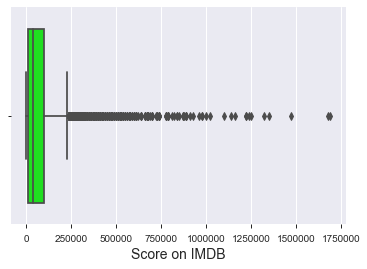

In [72]:
sns.boxplot(x=selection['num_voted_users'], color='lime')
plt.xlabel('Score on IMDB', fontsize=14)
plt.show()

# num_voted_users

In [69]:
selection['num_voted_users'] = selection['num_voted_users'].round(-4)

In [75]:
selection['num_voted_users'].head(10)

movie_title
Avatar                                        890000
Pirates of the Caribbean: At World's End      470000
Spectre                                       280000
The Dark Knight Rises                        1140000
John Carter                                   210000
Spider-Man 3                                  380000
Tangled                                       290000
Avengers: Age of Ultron                       460000
Harry Potter and the Half-Blood Prince        320000
Batman v Superman: Dawn of Justice            370000
Name: num_voted_users, dtype: int64

In [120]:
num_voted_users = selection['num_voted_users']
print(len(num_voted_users)) 

4863


In [132]:
actor_1_name = selection['actor_1_name']
actor_2_name = selection['actor_2_name']
actor_3_name = selection['actor_3_name']

actor_1_facebook_likes = selection['actor_1_facebook_likes']
actor_2_facebook_likes = selection['actor_2_facebook_likes']
actor_3_facebook_likes = selection['actor_3_facebook_likes']

movie_title = selection.index.values.tolist()
num_voted_users = selection['num_voted_users']
num_voted_users1 = selection[selection['num_voted_users'] ==0]

imdb_score = selection['imdb_score']

In [134]:
print(len(num_voted_users1))

881


In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(actor_1_facebook_likes, num_voted_users, test_size = 0.2, random_state = 0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [96]:
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [106]:
print(predictions[0:5])
print(y_test[0:5])

[[106135.1693882 ]
 [ 81482.16547067]
 [ 76286.54489505]
 [ 75648.64841868]
 [107675.98213305]]
[[ 30000]
 [ 10000]
 [160000]
 [     0]
 [ 10000]]


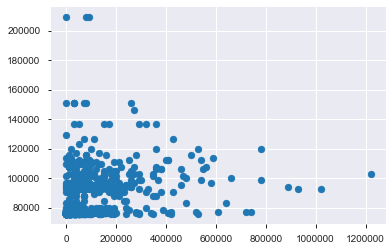

In [107]:
plt.scatter(y_test,predictions)

In [111]:
y_train2 = y_train.astype(int)
y_test2 = y_test.astype(int)

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gs = GaussianNB()
model_gs = gs.fit(X_train,y_train2)
predictions_gs = gs.predict(X_test)

gs_score = model_gs.score(X_test,y_test2) * 100

In [115]:
gs_score

11.921891058581705

Voordat we alle aantallen hebben afgerond waren er 0, 0-waarden. Nu ronden we alles af op tienduizend-tallen om zo te categoriseren en zijn er 881 waarden die afgerond worden naar 0.

# OVERIG

# Wat is de invloed op populariteit van een film als er een populaire acteur wordt gecast?

- bereken de populariteit van een acteur -> naam linken aan facebook-likes
- bereken de populariteit van een film -> film linken aan imdb-score

In [89]:
actor_1_name = selection['actor_1_name']
actor_2_name = selection['actor_2_name']
actor_3_name = selection['actor_3_name']

actor_1_facebook_likes = selection['actor_1_facebook_likes']
actor_2_facebook_likes = selection['actor_2_facebook_likes']
actor_3_facebook_likes = selection['actor_3_facebook_likes']

movie_title = selection.index.values.tolist()
imdb_score = selection['imdb_score']

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]), <a list of 9 Text xticklabel objects>)

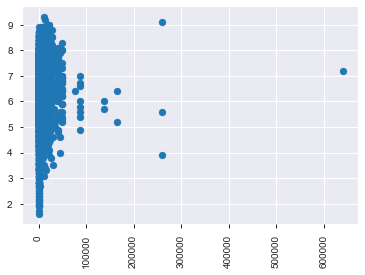

In [27]:
# plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(actor_1_facebook_likes,imdb_score)
plt.xticks(rotation=90)

Wat er duidelijk naar voren komt in het grafiek hierboven is dat er wel degelijk een correlatie is tussen imdb_score van een film en de populariteit van een acteur gemeten met facebook likes. 
Echter zijn er ook  gevallen waarin de facebook likes niet veel over de film zelf vertelt. In het voorbeeld hierboven speelt de acteur met de meeste likes niet in een film die het best heeft gescoord op imdb.

In [28]:
# import plotly.express as px
# iris = px.data.iris()
# fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
#               color='species')
# fig.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(actor_1_facebook_likes, imdb_score, test_size = 0.2, random_state = 0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [31]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3890, 1) (3890, 1)
(973, 1) (973, 1)


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

fit functie gebruiken op de train_set om de test_set te voorspellen

In [34]:
predictions[0:5]

array([[6.48406123],
       [6.39517825],
       [6.37644616],
       [6.37414632],
       [6.48961641]])

In [35]:
y_test[0:5]

array([[7.5],
       [5.3],
       [7.8],
       [3.5],
       [5.5]])

Zoals je ziet wijken de voorspellingen heel erg af van de werkelijke test_set

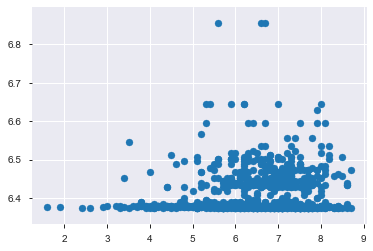

In [36]:
plt.scatter(y_test,predictions)
# x true values en y predictions

In [37]:
lr_score = model.score(X_test,y_test) * 100

In [38]:
lr_score

0.9596415643765122

In [39]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Voor het Gaussian algoritme moeten we de float-waarden in de 2D-array converten naar int-waarden

In [40]:
y_train2 = y_train.astype(int)
y_test2 = y_test.astype(int)

gs = GaussianNB()
model_gs = gs.fit(X_train,y_train2)
predictions_gs = gs.predict(X_test)

gs_score = model_gs.score(X_test,y_test2) * 100

In [41]:
gs_score

34.42959917780062

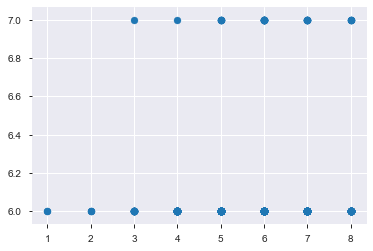

In [42]:
plt.scatter(y_test2,predictions_gs) # hier nog even verder naar kijken; wat betekent het

In [43]:
from sklearn.svm import SVC

svc = SVC()
model_svc = svc.fit(X_train, y_train2)
predictions_svc = svc.predict(X_test)

svc_score = model_svc.score(X_test,y_test2) * 100

In [44]:
svc_score

34.943473792394656

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train2)
predictions_dt = dt.predict(X_test)

dt_score = model_dt.score(X_test,y_test2) * 100

In [47]:
dt_score

31.96300102774923

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train, y_train2)
predictions_knn = knn.predict(X_test)

knn_score = model_knn.score(X_test,y_test2) * 100

In [50]:
knn_score

31.551901336073996

In [51]:
from sklearn.linear_model import Perceptron

In [52]:
perceptron = Perceptron()
model_perceptron = perceptron.fit(X_train, y_train2)
predictions_perceptron = perceptron.predict(X_test)

perceptron_score = model_perceptron.score(X_test,y_test2) * 100

In [53]:
perceptron_score

6.3720452209660845

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
randomforest = RandomForestClassifier()
model_randomforest = randomforest.fit(X_train, y_train2)
predictions_randomforest = randomforest.predict(X_test)

randomforest_score = model_randomforest.score(X_test,y_test2) * 100

In [56]:
randomforest_score

32.06577595066803

In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
sgd = SGDClassifier()
model_sgd = sgd.fit(X_train, y_train2)
predictions_sgd = sgd.predict(X_test)

sgd_score = model_sgd.score(X_test, y_test2) * 100

In [59]:
sgd_score

27.646454265159303

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbk = GradientBoostingClassifier()

model_gbk = gbk.fit(X_train, y_train2)
predictions_gbk = gbk.predict(X_test)

gbk_score = model_gbk.score(X_test, y_test2) * 100

In [62]:
gbk_score

34.224049331963

In [63]:
vergelijking = pd.DataFrame({'Model':['Logistic Regression','Gaussian','SVC','Decision Tree','Kneighbors','Perceptron','SGDClassifier','GradientBoostingClassifier'],'Score': [lr_score,gs_score,svc_score,dt_score,knn_score,perceptron_score,sgd_score,gbk_score]})
vergelijking.sort_values(by='Score',ascending=False)

,Model,Score
2,SVC,34.943474
1,Gaussian,34.429599
7,GradientBoostingClassifier,34.224049
3,Decision Tree,31.963001
4,Kneighbors,31.551901
6,SGDClassifier,27.646454
5,Perceptron,6.372045
0,Logistic Regression,0.959642
